In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from word2number import w2n
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv(r"C:\Users\Admin\Desktop\AI\Machine learning\dataset\hiring.csv")
data.head()

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 4 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   experience                  6 non-null      object 
 1   test_score(out of 10)       7 non-null      float64
 2   interview_score(out of 10)  8 non-null      int64  
 3   salary($)                   8 non-null      int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 388.0+ bytes


In [4]:
data

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [5]:
data['experience'] = data['experience'].fillna('zero').apply(w2n.word_to_num)

In [6]:
data

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,NaN,7,72000
7,11,7.0,8,80000


In [7]:
data['test_score(out of 10)'] = data['test_score(out of 10)'].fillna(data['test_score(out of 10)'].mean())

In [8]:
data['test_score(out of 10)'] = data['test_score(out of 10)'].astype(int)

In [9]:
data

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8,9,50000
1,0,8,6,45000
2,5,6,7,60000
3,2,10,10,65000
4,7,9,6,70000
5,3,7,10,62000
6,10,7,7,72000
7,11,7,8,80000


In [10]:
data.corr()

,experience,test_score(out of 10),interview_score(out of 10),salary($)
experience,1.000000,-0.352557,-0.290480,0.908017
test_score(out of 10),-0.352557,1.000000,0.186655,-0.077524
interview_score(out of 10),-0.290480,0.186655,1.000000,0.037820
salary($),0.908017,-0.077524,0.037820,1.000000


<Axes: >

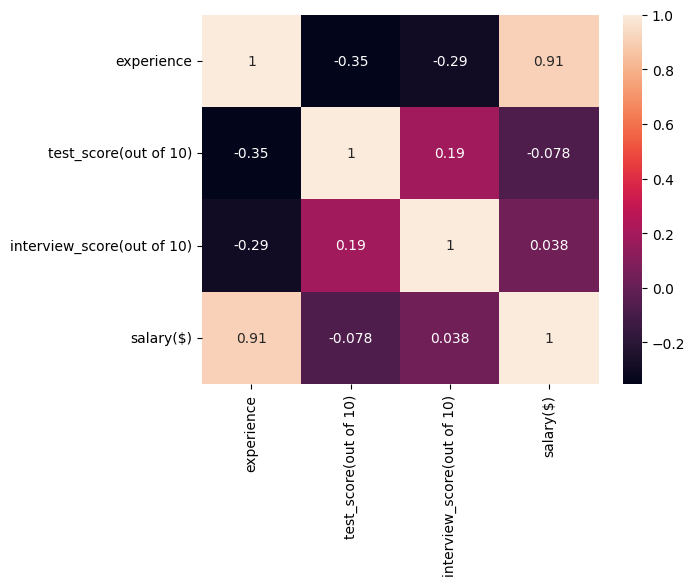

In [11]:
sns.heatmap(data.corr(),annot=True)

In [12]:
x=data.drop('salary($)',axis=1)
y=data['salary($)']

In [13]:
x

,experience,test_score(out of 10),interview_score(out of 10)
0,0,8,9
1,0,8,6
2,5,6,7
3,2,10,10
4,7,9,6
5,3,7,10
6,10,7,7
7,11,7,8


In [14]:
y

0    50000
1    45000
2    60000
3    65000
4    70000
5    62000
6    72000
7    80000
Name: salary($), dtype: int64

In [15]:
model=LinearRegression()

In [16]:
model.fit(x,y)

LinearRegression()

In [17]:
prediction=model.predict(x)
prediction

array([52090.46734071, 45648.01964161, 57964.2290839 , 64525.1061363 ,
       68325.21184635, 60783.44785255, 74796.8832586 , 79866.63483999])

In [18]:
y.values

array([50000, 45000, 60000, 65000, 70000, 62000, 72000, 80000],
      dtype=int64)

In [19]:
mean_absolute_error(y,prediction)

1383.8425602291463